# HW 2

The purpose of this homework is to create a scale-free network using the Barabasi-Albert model. Create an initial graph using the process for the Barabasi-Albert algorithm from the [wikipedia page](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model#Algorithm). Add new vertices to the graph, creating new edges between each new vertex and existing vertices using the degree-dependent probability from the wikipedia page.

In [137]:
import networkx as nx
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections

mpl.use('tkagg')

In [144]:
def barabasi_albert(num_nodes, m):
    G = nx.complete_graph(m)
    for i in range(2, num_nodes):
        G = add_barabasi_node(G, num_nodes, m)
#         plotFigure(G)
    return G
    

In [107]:
def add_barabasi_node(G, num_nodes, m):
    P = get_probs(G)
#     nx.draw_networkx_nodes(G, nodelist=[n], pos={ n: (np.cos(np.pi * n / num_nodes), np.sin(np.pi * n / num_nodes))})
    neighbors = np.random.choice(list(G.nodes()), p=P, replace=False, size=m)
    N = len(G.nodes)
    G.add_edges_from([(N, n) for n in neighbors])
    return G

In [108]:
def get_probs(G):
    probs=[]
    probs.append([tup[1] for tup in list(G.degree(list(G.nodes)))])
    probs = probs[0]
    sumProb = sum(probs)
    probs = [p/sumProb for p in probs]
    return probs

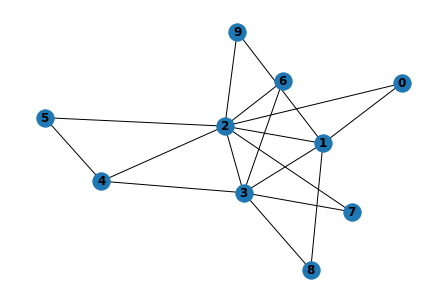

In [110]:
G = barabasi_albert(10, 2)
nx.draw(G, with_labels=True, font_weight="bold")

In [ ]:
def animate_graph(G):
    for i in range(G.number_of_nodes()):
        nx.draw_networkx_nodes([i])
        nx.draw_networkx_edges()

## Run the algorithm for various time durations that you choose.


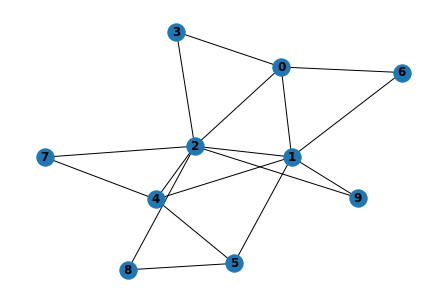

In [116]:
G = barabasi_albert(10, 2)
nx.draw(G, with_labels=True, font_weight="bold")

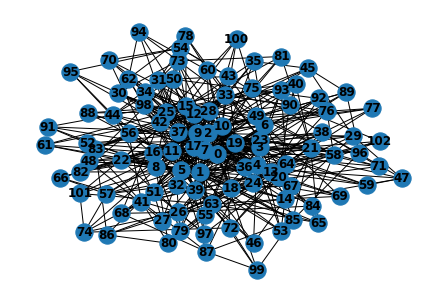

In [117]:
G = barabasi_albert(100, 5)
nx.draw(G, with_labels=True, font_weight="bold")

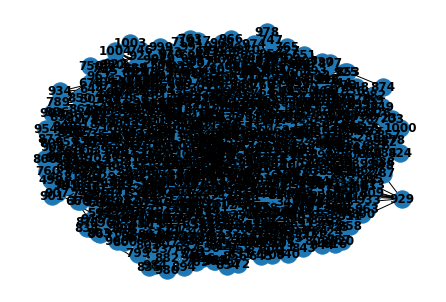

In [121]:
G = barabasi_albert(1000, 10)
nx.draw(G, with_labels=True, font_weight="bold")

## Create an animation for what the network looks like as it evolves. Do this using the [add_node](https://networkx.org/documentation/stable/tutorial.html) and the [add_edge](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html) methods from NetworkX. 


In [133]:
def plotFigure(G):
    plt.clf()
    plt.figure(1);plt.ion()
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.waitforbuttonpress(.3)

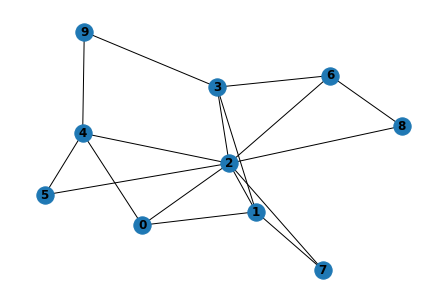

In [134]:
G = barabasi_albert(10, 2)

## Compare the networks you create with the networks created by the NetworkX [barabasi_albert_graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) method from NetworkX.

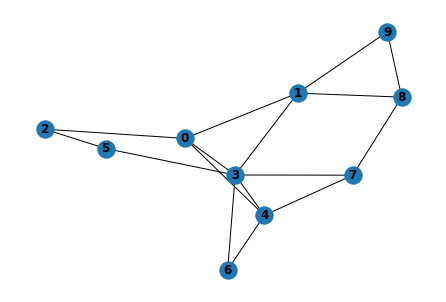

In [135]:
nx_bag = nx.barabasi_albert_graph(10, 2)
nx.draw(nx_bag, with_labels=True, font_weight='bold')

Thankfully, the results are very similar where there are a minimum of $m$ connections between nodes and there are more popular nodes that attract connections.

### Choose some of the interesting results and plot the histogram of the degree distribution. Using the "log-log" plot technique discussed in class, discuss whether the network is scale free.


In [140]:
def plot_degree_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()
    return deg, cnt

((1739,
  1532,
  1524,
  1369,
  1340,
  1293,
  1257,
  1255,
  1216,
  1197,
  1180,
  1143,
  1124,
  1071,
  1009,
  947,
  946,
  929,
  897,
  847,
  845,
  826,
  815,
  791,
  773,
  772,
  769,
  765,
  756,
  740,
  732,
  710,
  658,
  649,
  646,
  638,
  627,
  608,
  607,
  603,
  584,
  573,
  560,
  559,
  558,
  555,
  551,
  550,
  547,
  541,
  525,
  516,
  514,
  513,
  501,
  499,
  498,
  494,
  481,
  476,
  474,
  457,
  454,
  447,
  441,
  433,
  432,
  427,
  424,
  415,
  410,
  406,
  404,
  400,
  392,
  386,
  380,
  375,
  372,
  370,
  368,
  362,
  358,
  356,
  355,
  354,
  353,
  351,
  343,
  342,
  338,
  335,
  332,
  328,
  324,
  319,
  316,
  315,
  312,
  309,
  308,
  307,
  306,
  304,
  303,
  298,
  297,
  295,
  294,
  292,
  291,
  290,
  288,
  287,
  286,
  285,
  282,
  280,
  279,
  278,
  275,
  272,
  271,
  270,
  269,
  266,
  264,
  263,
  262,
  261,
  258,
  257,
  256,
  255,
  253,
  251,
  250,
  249,
  247,
  246,
  245

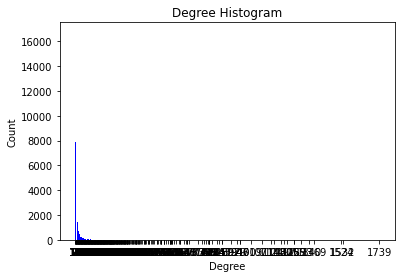

In [147]:
G = barabasi_albert(int(1e5), 10)
plot_degree_histogram(G)